In [1]:
import numpy as np

import matplotlib.pyplot as plt

from timeit import default_timer as timer

from nmresearch import Crystal
from nmresearch import Disorder
from nmresearch import Atom, AtomPos
from sklearn.mixture import GaussianMixture


# generate the FaP crystal
d1 = 0.36853
d2 = 0.39785
fl = Atom(dim_s=2, gamma=251.662 * 10**6, name="flourine")
ph = Atom(dim_s=2, gamma=108.291 * 10**6, name="phosphorous")

unit_cell = {
    fl: np.array([[0, 0, 1 / 4], [0, 0, 3 / 4]]),
    ph: np.array(
        [
            [d1, d2, 0.25],
            [-d2, d1 - d2, 0.25],
            [d2 - d1, -d1, 0.25],
            [-d1, -d2, 0.75],
            [d2, d2 - d1, 0.75],
            [d1 - d2, d1, 0.75],
        ]
    ),
}

fp_lat = np.array(
    [
        [9.375, 9.375 * np.cos(120 * np.pi / 180), 0],
        [0, 9.375 * np.sin(120 * np.pi / 180), 0],
        [0, 0, 6.887],
    ]
)
# crystal object
fp_xtal = Crystal(unit_cell, fp_lat)


In [2]:
# disorder computation vehicle, with 5 unitcell shells
mycalc_5shell = Disorder(fp_xtal, 5)

In [3]:
# set a central "test-spin"
orig_atom = AtomPos.create_from_atom(atom=fl, position=[0, 0, 0.25 * 6.887])

In [4]:
v = mycalc_5shell.variance_estimate(orig_atom)
print("Standard deviation of central spin, krad/s: " + str(2*v**0.5 * 1e-3))

Standard deviation of central spin, krad/s: 5.847497734028682


In [5]:
mycalc_5shell.disorder_sum(orig_atom)

9660.480374561352

In [7]:
temp = []
for k in range(5,80,5):
    mycalc_kshell = Disorder(fp_xtal, k)
    temp.append([k,mycalc_kshell.disorder_sum(orig_atom)])

KeyboardInterrupt: 

In [10]:
vals = np.array(temp)

Text(0, 0.5, 'interaction sum (rad / s)')

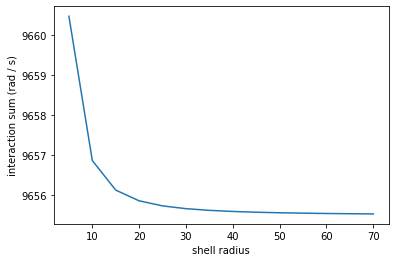

In [17]:
plt.plot(vals.transpose()[0],vals.transpose()[1])
plt.xlabel("shell radius")
plt.ylabel("interaction sum (rad / s)")

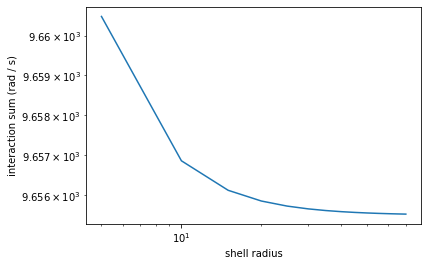

In [21]:
plt.loglog(vals.transpose()[0],vals.transpose()[1])
plt.xlabel("shell radius")
plt.ylabel("interaction sum (rad / s)")
plt.show()

In [ ]:
temp = []
for k in [50,100,150,200,500,1000]:
    mycalc_kshell = Disorder(fp_xtal, k)
    temp.append([k,mycalc_kshell.disorder_sum(orig_atom)])

In [1]:
9656*2

19312

In [3]:
.5*19312*1.5*10**-6

0.014483999999999999